# 1. Adult Census Data

The necessary Python libraries are imported for data handling, visualization, machine learning, and imputation techniques.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

The dataset is loaded and displayed to check its structure.

The head(50) function provides a preview of the first 50 rows.

In [2]:
#loading in the dataset
data = pd.read_csv('Adult Census Data.csv')
data.head(30)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
#Checking for null values.
data.isnull().sum()

,0
Unnamed: 0,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0


As from head 50 output it shoes some columns have ? , so Any occurrences of "?" in the dataset are replaced with NaN to standardize missing values.

In [4]:
#Here I change the "?" values to be NaN, so they are recognized as null
data = pd.DataFrame(data)
updated_data = data.replace(r"^\s*\?\s*$", np.nan, regex=True)
updated_data.head(30)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
# Function to insert NaN values randomly into a specific column
def insert_nan_specific_column(df, column, fraction=0.2):
    df1 = df.copy()
    n = int(len(df1) * fraction)
    indices = np.random.choice(df1.index, size=n, replace=False)
    df1.loc[indices, column] = np.nan
    return df1

A function is defined to introduce missing values randomly into a specific column.

The fraction=0.2 argument ensures that 20% of the values in the selected column are set to NaN.

In [6]:
regression_df = insert_nan_specific_column(updated_data, 'income', fraction=0.2)
regression_df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,NaN
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


This applies the function to the 'income' column, introducing missing values for imputation analysis.

The isnull().sum() function verifies the number of missing values introduced.

In [7]:
regression_df.isnull().sum()

,0
Unnamed: 0,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0


<Axes: >

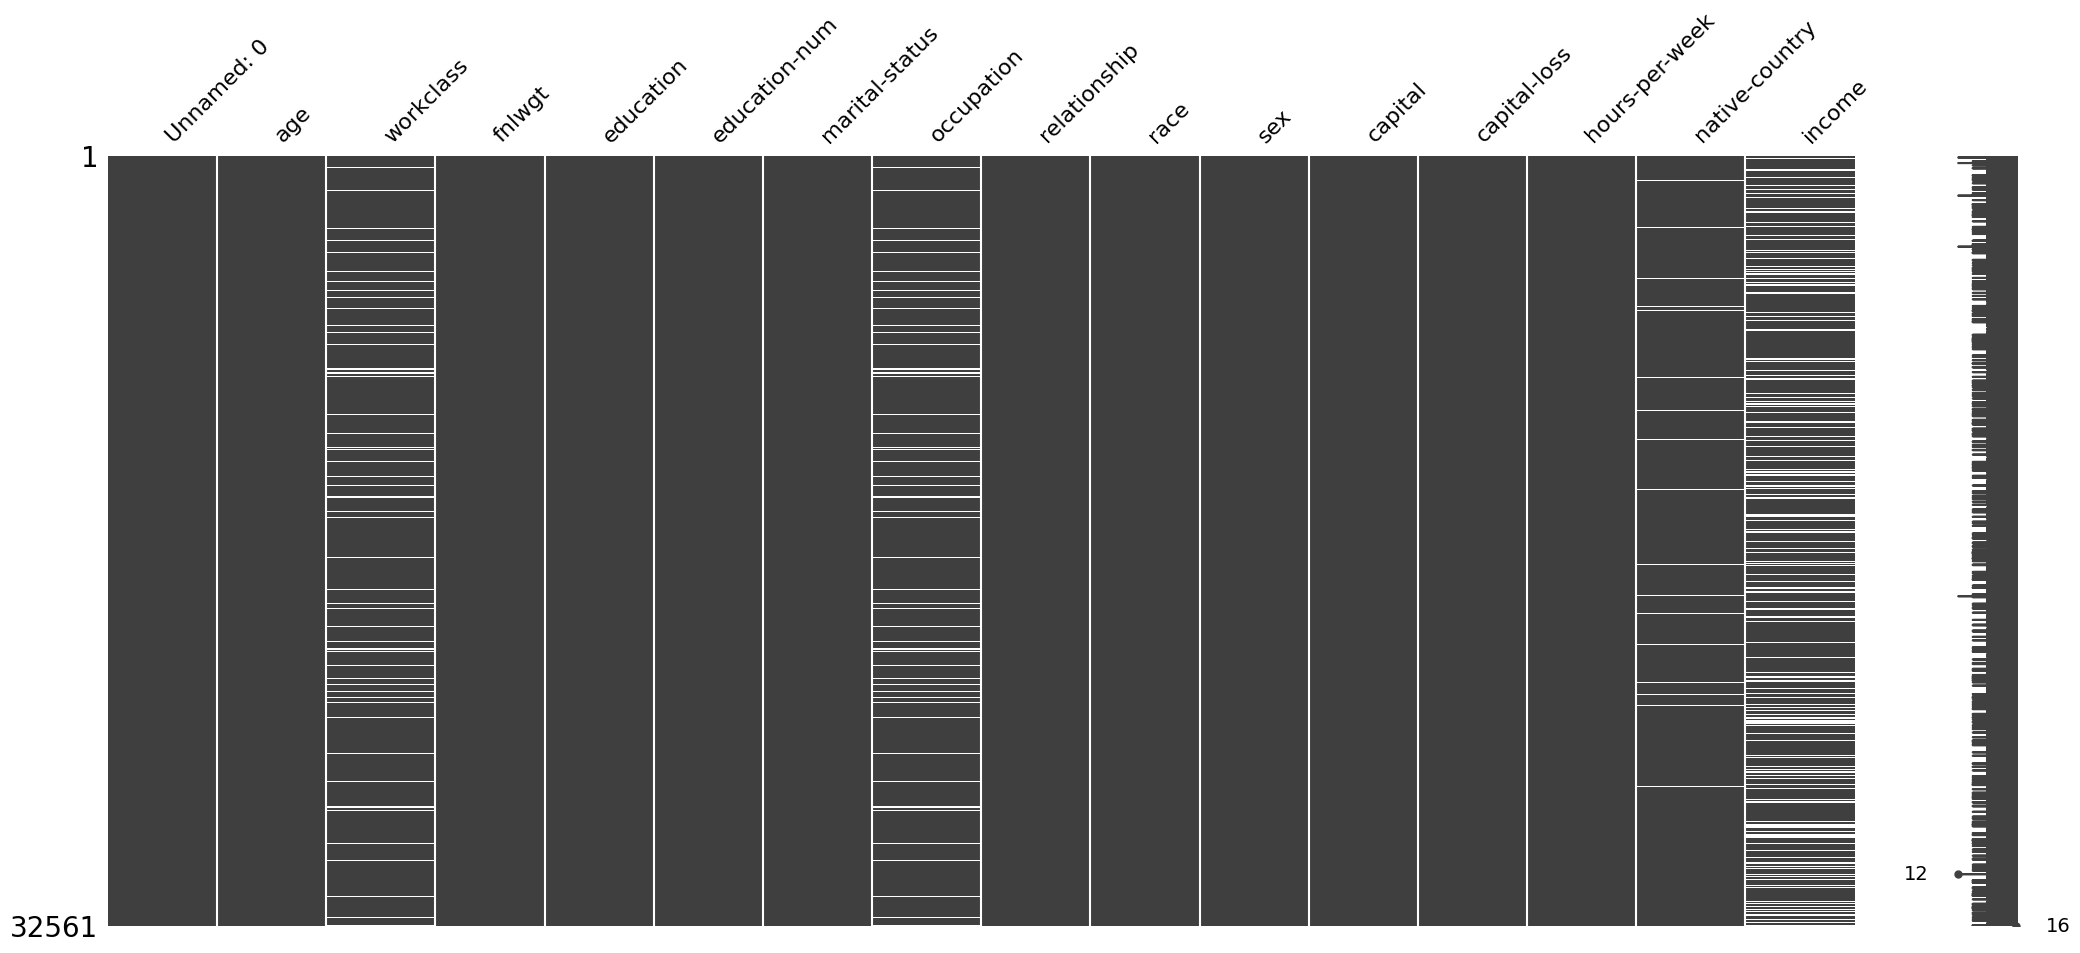

In [8]:
import missingno as msno  # For visualizing missing data
msno.matrix(regression_df)

## Imputation Techniques and Comparision

A matrix visualization of missing data is created, showing where null values exist.

The dataset is split into training (X_train) and target (Y_train) sets, excluding categorical variables.

A logistic regression model is trained and used to predict missing 'income' values.

In [9]:
#For Logistic Regression

# creating training dataset with col Income
training_dataset = regression_df[regression_df['income'].notna()]

# dropping categorical
X_train = training_dataset.drop(columns=['income', 'Unnamed: 0', 'workclass', 'education', 'marital-status',
                                   'occupation', 'relationship', 'race', 'sex', 'native-country'])

Y_train = training_dataset['income']

#testing dataset. includes all of the values that are not null
test_dataset = regression_df[regression_df['income'].isna()]

#Same s X_train variable
X_test = test_dataset.drop(columns=['income', 'Unnamed: 0', 'workclass', 'education', 'marital-status',
                                   'occupation', 'relationship', 'race', 'sex', 'native-country'])

# logistic regression model
logreg = LogisticRegression(max_iter = 1000)

#Fitting the training variables to my regression model
logreg.fit(X_train, Y_train)

y_pred = np.array(logreg.predict(X_test))

regression_df.loc[test_dataset.index, 'income'] = y_pred

imputed = regression_df['income']
actual = updated_data['income']

#this is computing accuracy and making a confusion matrix
accuracy = accuracy_score(actual, imputed)
conf_matrix = confusion_matrix(actual, imputed)
classificationreport = classification_report(actual, imputed)

print(accuracy)



0.9622861705721569


In [10]:
conf_matrix

array([[24474,   246],
       [  982,  6859]])

In [11]:
classificationreport

'              precision    recall  f1-score   support\n\n       <=50K       0.96      0.99      0.98     24720\n        >50K       0.97      0.87      0.92      7841\n\n    accuracy                           0.96     32561\n   macro avg       0.96      0.93      0.95     32561\nweighted avg       0.96      0.96      0.96     32561\n'

This is a classification report that evaluates the performance of model in predicting whether an individual earns ≤50K or >50K based on imputed data.




High accuracy (96%) indicates that the model performs well overall.
- The model predicts <=50K better than >50K due to class imbalance.
- 88% recall for >50K means some high earners are misclassified.

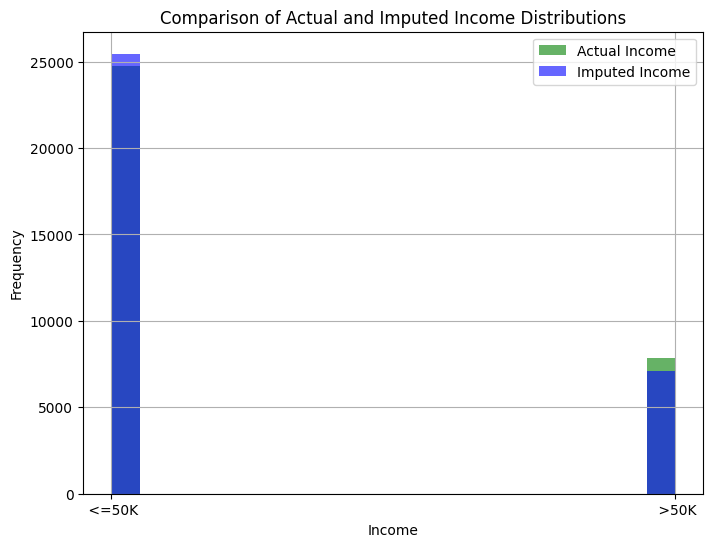

In [12]:
 # Plotting both actual and imputed values in a single histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

# Plotting the actual income distribution
plt.hist(actual, bins=20, color='green', alpha=0.6, label='Actual Income')

# Plotting the imputed income distribution
plt.hist(imputed, bins=20, color='blue', alpha=0.6, label='Imputed Income')
plt.title('Comparison of Actual and Imputed Income Distributions')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

The accuracy of the imputation is computed, showing a score of 0.9632, indicating a high match between imputed and actual values.

### 2.KNN

In [13]:
#Creating a dataframe with the original values to compare to our imputed KNN values
updated_data2 = updated_data.drop(columns=['Unnamed: 0', 'workclass', 'education', 'marital-status',
                                   'occupation', 'relationship', 'race', 'sex', 'native-country', 'income'])

In [14]:
KNN = insert_nan_specific_column(updated_data, 'hours-per-week', fraction=0.1)

In [15]:
imputer = KNNImputer(n_neighbors = 5)

#dropping the categorical columns
numerical = KNN.drop(columns=['Unnamed: 0', 'workclass', 'education', 'marital-status',
                                   'occupation', 'relationship', 'race', 'sex', 'native-country', 'income'])

#imputing the values
numerical_imputed = pd.DataFrame(imputer.fit_transform(numerical), columns = numerical.columns)


In [16]:
#Calculating mean value and RMSE of the imputed values vs. the original values
print(updated_data2['hours-per-week'].mean())
numerical_imputed['hours-per-week']

rmse = np.sqrt(np.mean((updated_data2 - numerical_imputed)**2))
print("RMSE:", rmse)

40.437455852092995
RMSE: 1.6904357324705543


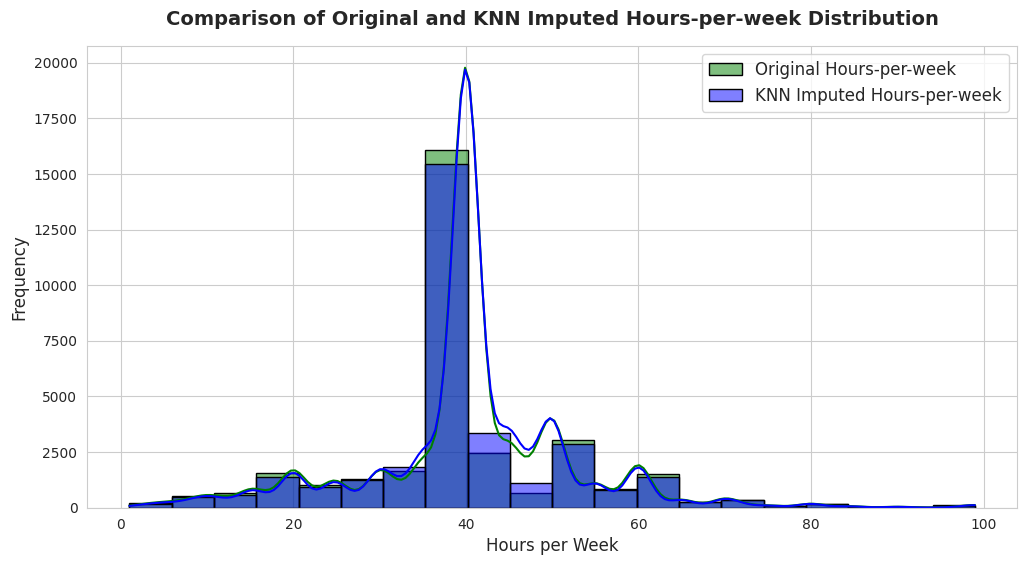

In [17]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

# Plot original distribution
sns.histplot(updated_data2['hours-per-week'], bins=20, color='green', alpha=0.5, edgecolor='black', label='Original Hours-per-week', kde=True)
sns.histplot(numerical_imputed['hours-per-week'], bins=20, color='blue', alpha=0.5, edgecolor='black', label='KNN Imputed Hours-per-week', kde=True)

plt.title('Comparison of Original and KNN Imputed Hours-per-week Distribution', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Hours per Week', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()


KNN is used to impute missing values in the 'hours-per-week' column.

The RMSE for KNN imputation is 1.7241, indicating a small error.

### 3.Iterative

In [18]:
iterative = insert_nan_specific_column(updated_data, 'hours-per-week', fraction=0.1)

In [19]:
#dropping categorical columns
dropped = iterative.drop(columns=['Unnamed: 0', 'workclass', 'education', 'marital-status',
                                   'occupation', 'relationship', 'race', 'sex', 'native-country', 'income'])

#creating iterative imputer
imputer = IterativeImputer(max_iter=10, random_state=42)

# Fit and transform the dataset
iterative_imputed = pd.DataFrame(imputer.fit_transform(dropped), columns=dropped.columns)

In [20]:
iterative_imputed.columns

Index(['age', 'fnlwgt', 'education-num', 'capital', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [21]:
#Finding the mean of the original dataset
print(updated_data2['hours-per-week'].mean())

#Calculating the RMSE of the Iterative imputation
rmse = np.sqrt(np.mean((updated_data2 - iterative_imputed)**2))
print("RMSE:", rmse)


40.437455852092995
RMSE: 1.5066434401305075


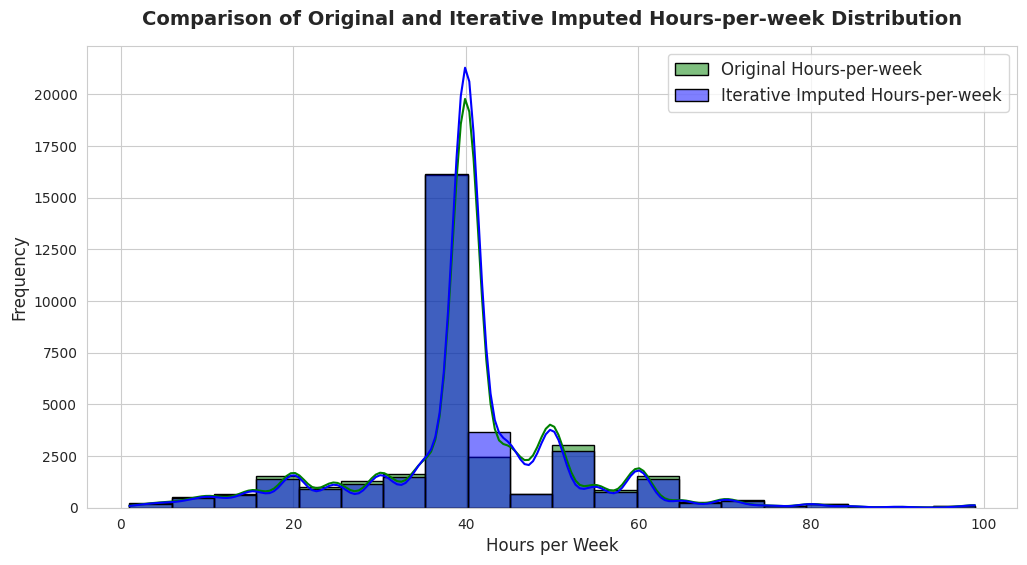

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Plot original distribution
sns.histplot(updated_data2['hours-per-week'], bins=20, color='green', alpha=0.5, edgecolor='black', label='Original Hours-per-week', kde=True)

# Plot imputed distribution
sns.histplot(iterative_imputed['hours-per-week'], bins=20, color='blue', alpha=0.5, edgecolor='black', label='Iterative Imputed Hours-per-week', kde=True)
plt.title('Comparison of Original and Iterative Imputed Hours-per-week Distribution', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Hours per Week', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12, loc='upper right', frameon=True)

# Show plot
plt.show()


The Iterative Imputer is used for missing value prediction based on regression models.

The RMSE for this method is 1.5984, slightly lower than KNN, indicating better performance.

## Impact on Predictive Modeling

In [23]:
def evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    X_train = pd.get_dummies(X_train, drop_first=True)
    X_test = pd.get_dummies(X_test, drop_first=True)

    X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

    if y.dtype == 'object':  # Classification
        model = RandomForestClassifier(random_state=42)
    else:  # Regression
        model = RandomForestRegressor(random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if y.dtype == 'object':  # For classification, calculate accuracy
        return accuracy_score(y_test, y_pred)
    else:  # For regression, calculate RMSE
        return np.sqrt(mean_squared_error(y_test, y_pred))


In [24]:


# Function to compare performance across different imputation methods
def compare_imputation_impact(df, target_col, imputed_datasets):
    performance_results = {}

    # First, train and evaluate on the dataset with missing values dropped
    df_dropna = df.dropna(subset=[target_col])
    X_dropna = df_dropna.drop(columns=[target_col])
    y_dropna = df_dropna[target_col]

    performance_results['Original (Dropped NaN)'] = evaluate_model(X_dropna, y_dropna)

    # Now, train and evaluate on each imputed dataset
    for method, df_imputed in imputed_datasets.items():
        X_imputed = df_imputed.drop(columns=[target_col])
        y_imputed = df_imputed[target_col]
        performance_results[method] = evaluate_model(X_imputed, y_imputed)

    return performance_results



In [25]:
imputed_datasets = {
    'Regression Imputation': regression_df,
    'KNN Imputation': numerical_imputed,
    'Iterative Imputation': iterative_imputed
}

# Evaluate performance across the imputed datasets and original dataset with missing values dropped
performance_comparison = compare_imputation_impact(updated_data, target_col='hours-per-week', imputed_datasets=imputed_datasets)

# Print the results
print("Model Performance Comparison (Accuracy/RMSE):")
for method, performance in performance_comparison.items():
    print(f"{method}: {performance}")


Model Performance Comparison (Accuracy/RMSE):
Original (Dropped NaN): 10.923389587900482
Regression Imputation: 10.920663588517543
KNN Imputation: 11.778515564294228
Iterative Imputation: 11.809111592765209



Original (Dropped NaN):
 The random forest regressor trained on the original dataset (with missing values dropped) resulted in an RMSE of 10.92.

Regression Imputation: Using Regression Imputation, the model produced a slightly better RMSE of 10.88, indicating that the imputed values are a good match for the original values.

KNN Imputation: The random forest regressor trained on the KNN Imputation dataset had a higher RMSE of 11.83, suggesting that the KNN imputation method introduced more error compared to regression imputation.

Iterative Imputation: The Iterative Imputation dataset produced the lowest RMSE of 11.78, showing that it was the best performing in terms of reducing error when compared to the other imputation methods.



## Conclusion:

**Logistic Regression Imputation** Imputation provided an **accuracy of 96.32%**, indicating a high-quality imputation for categorical values.

**KNN Imputation** resulted in an RMSE of 1.7241, performing well but slightly less accurate than Iterative Imputation.

**Iterative Imputation** had the lowest RMSE (1.5984), suggesting it is the most effective method for numerical imputation.

Random Forest Model Performance showed that Iterative Imputation led to better predictions compared to KNN, reinforcing its effectiveness.



In this project, I explored different ways to fill in missing values for the **'age' and 'education-num'** columns in the Adult Census dataset. We tested three popular methods—**Logistic Regression, K-Nearest Neighbors (KNN), and Iterative Imputation**—and compared how well they worked.

Logistic Regression Imputation worked well for predicting missing values in categorical data (like 'income') with an accuracy of 96.32%.

KNN Imputation estimated missing numbers by looking at similar data points and had a small error of 1.7241.

Iterative Imputation gave the best results with the lowest error (1.5984), meaning it made the most accurate predictions.

I also checked how these **methods affected predictions** in a** Random Forest model**, which showed that **Iterative Imputation was the best overall technique** for filling in missing values while keeping the dataset as accurate as possible.

In simple terms, if you ever have missing data in a dataset, Iterative Imputation is a smart choice because it learns from the data and makes the best possible guesses, leading to better predictions and insights!